In [2]:
# TF-IDF VERSION
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
# Load dataset
csv_file_path = "../caption_from_body/posts_caption_from_body.csv"  # Update with your actual file path
df = pd.read_csv(csv_file_path)
df.head()

,PostID,Caption,Body,Tags,Location
0,1,Food for air travel,For most of our flights starting from our airp...,NaN,NaN
1,2,Would you rather spend 2 days in Edinburgh and...,In July we are going on a 16 day trip to Europ...,NaN,NaN
2,3,If you’ve done a Caribbean or Bahamas cruise w...,I’m in Dallas so I’d have to fly to Miami or s...,NaN,NaN
3,4,"One week in Spain, the other week in….where?",We are attending a family reunion in southern ...,NaN,NaN
4,5,Munich/Spain Itinerary,"Hey guys, hoping someone who's visited some of...",NaN,NaN


In [4]:
# Combine Caption and Body for text analysis
df["text"] = df["Caption"].fillna("") + " " + df["Body"].fillna("")
df.head()

,PostID,Caption,Body,Tags,Location,text
0,1,Food for air travel,For most of our flights starting from our airp...,NaN,NaN,Food for air travel For most of our flights st...
1,2,Would you rather spend 2 days in Edinburgh and...,In July we are going on a 16 day trip to Europ...,NaN,NaN,Would you rather spend 2 days in Edinburgh and...
2,3,If you’ve done a Caribbean or Bahamas cruise w...,I’m in Dallas so I’d have to fly to Miami or s...,NaN,NaN,If you’ve done a Caribbean or Bahamas cruise w...
3,4,"One week in Spain, the other week in….where?",We are attending a family reunion in southern ...,NaN,NaN,"One week in Spain, the other week in….where? W..."
4,5,Munich/Spain Itinerary,"Hey guys, hoping someone who's visited some of...",NaN,NaN,"Munich/Spain Itinerary Hey guys, hoping someon..."


In [5]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words="english")

# we obtain a sparse matrix CSR (Compressed Sparse Row) format
# shape (number of posts, number of unique words)
# each value is the TF-IDF score of a word in a specific post
# it is stored in a format that saves space eliminating zero values associated with unused words in a specific sentence
# ex: (0, 3432)	0.5906320898137944 (post 0, word 3432 has a TF-IDF score of 0.5906320898137944)
# The full shape is retained so operations like matrix multiplication (cosine similarity) still work correctly.
tfidf_matrix = vectorizer.fit_transform(df["text"])
print(tfidf_matrix[0])
print(tfidf_matrix.shape)

# Compute Cosine Similarity
# ! This computes the similarity between all posts using cosine similarity based on their TF-IDF representations.
# ! Cosine similarity is applied between all posts (row vectors that in the calculation all have the same length
# so even if a post has 3 words and one has 5 then 0 values will be considered for the other words)
# ! Cosine similarity handles this by computing the dot product only on common indices,
# saving memory and computation time.
cosine_sim_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Convert to DataFrame for better visualization
similarity_df = pd.DataFrame(
    cosine_sim_matrix, index=df["PostID"], columns=df["PostID"]
)

similarity_df.head()

  (0, 3432)	0.5906320898137944
  (0, 621)	0.14556711169397285
  (0, 8406)	0.08095342253021973
  (0, 3397)	0.11120518026816972
  (0, 7744)	0.14710322194019884
  (0, 638)	0.34663681247721223
  (0, 1830)	0.20238127194433383
  (0, 3613)	0.16948048806209542
  (0, 7889)	0.20784136209535828
  (0, 2220)	0.14790187151186168
  (0, 1068)	0.14632531887721215
  (0, 4746)	0.19776483149977506
  (0, 7742)	0.15964258489701583
  (0, 6149)	0.19376588889231533
  (0, 3260)	0.16213966264114235
  (0, 3246)	0.19023857152922388
  (0, 6189)	0.109812018188709
  (0, 8920)	0.10741493247095424
  (0, 9056)	0.18422896900520438
  (0, 3766)	0.11724120324743298
  (0, 3862)	0.18708327862822982
  (0, 7447)	0.14073752028499506
  (0, 7470)	0.14956605430143258
(1899, 9186)


PostID,1,2,3,4,5,6,7,8,9,10,...,1890,1891,1892,1893,1894,1895,1896,1897,1898,1899
PostID,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.005635,0.000000,0.000000,0.064475,0.063018,0.000000,0.013019,0.003312,0.000000,...,0.058189,0.078563,0.012890,0.0,0.017695,0.000000,0.0,0.000000,0.000000,0.045534
2,0.005635,1.000000,0.009746,0.061129,0.074197,0.033368,0.012605,0.011195,0.002848,0.000000,...,0.039867,0.065177,0.022647,0.0,0.015216,0.021481,0.0,0.000000,0.000000,0.100301
3,0.000000,0.009746,1.000000,0.000000,0.020671,0.000000,0.033829,0.021110,0.005371,0.000000,...,0.016001,0.008575,0.000000,0.0,0.000000,0.095581,0.0,0.000000,0.000000,0.050887
4,0.000000,0.061129,0.000000,1.000000,0.142505,0.000000,0.009846,0.024295,0.010036,0.026480,...,0.025438,0.069516,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.011460,0.008458
5,0.064475,0.074197,0.020671,0.142505,1.000000,0.089067,0.022870,0.074765,0.037397,0.015215,...,0.062451,0.011573,0.008468,0.0,0.009229,0.013189,0.0,0.006607,0.015426,0.078211


In [6]:
# Save similarity matrix for later use
similarity_df.to_csv("../caption_from_body/posts_similarity_matrix.csv")

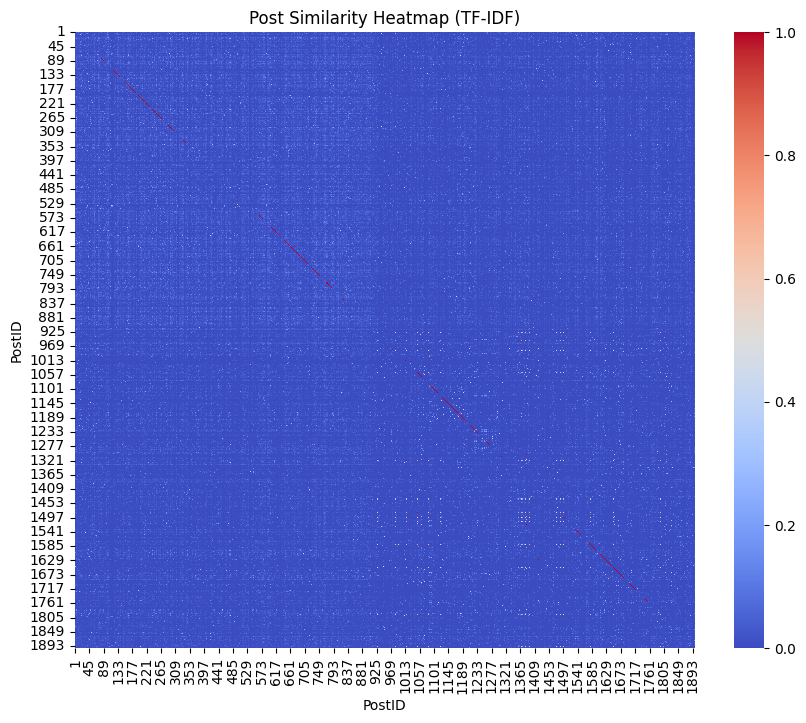

In [7]:
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_df, cmap="coolwarm", vmin=0, vmax=1)
plt.title("Post Similarity Heatmap (TF-IDF)")
plt.show()

Reduced matrix shape: (1899, 50)


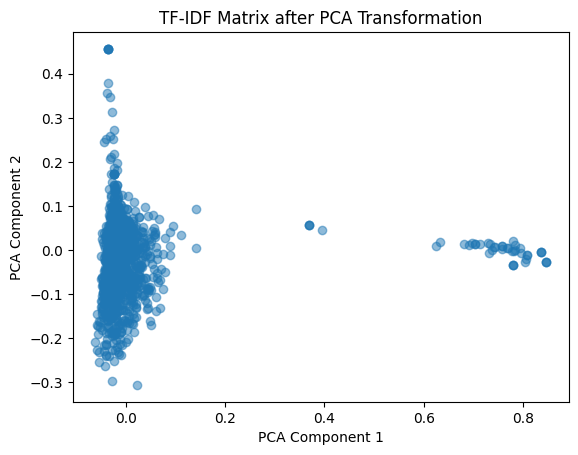

Text(0.5, 0.92, '3D Visualization of TF-IDF Matrix After PCA')

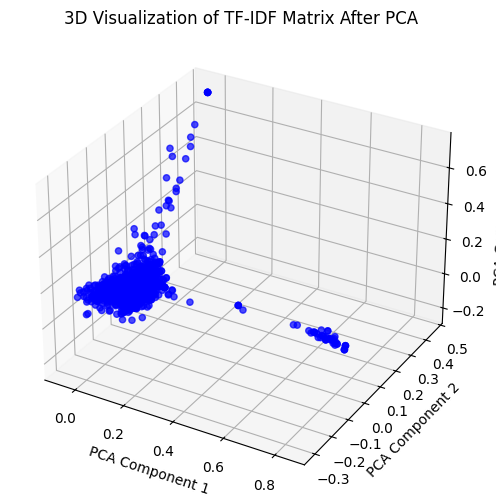

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


n_components = 50  
pca = PCA(n_components=n_components)
reduced_matrix = pca.fit_transform(tfidf_matrix)

print(f"Reduced matrix shape: {reduced_matrix.shape}")

plt.scatter(reduced_matrix[:, 0], reduced_matrix[:, 1], alpha=0.5)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("TF-IDF Matrix after PCA Transformation")
plt.show()

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")

sc = ax.scatter(
    reduced_matrix[:, 0], 
    reduced_matrix[:, 1], 
    reduced_matrix[:, 2], 
    alpha=0.7, 
    c='blue', 
    s=20
)

ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("PCA Component 3")
ax.set_title("3D Visualization of TF-IDF Matrix After PCA")

# CONCLUSION: CLUSTERING WON'T WORK AS POSTS ARE TOO SIMILAR


c:\MY_CODE\LICENTA\TravelApp\AI\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


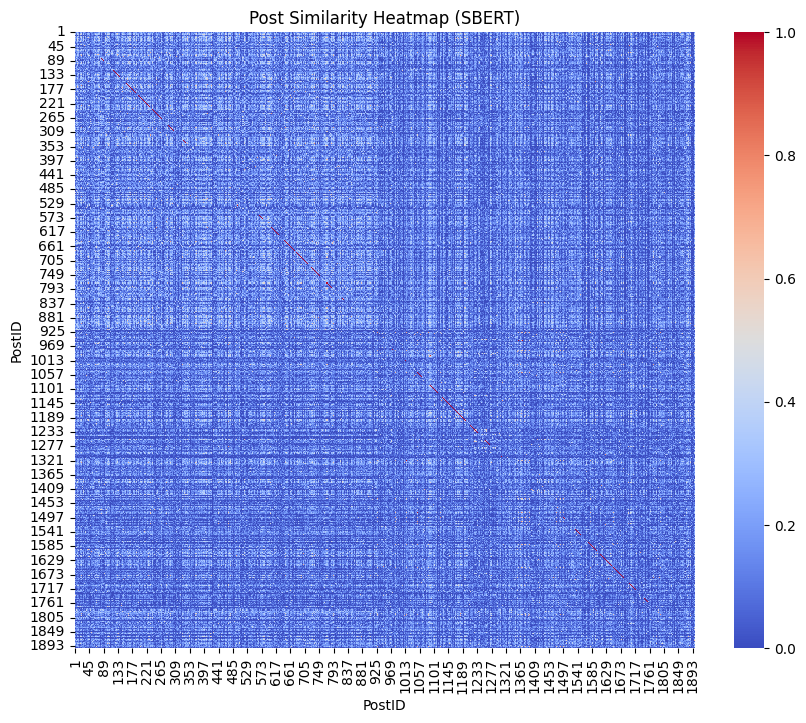

In [ ]:
# SBERT VERSION

from sentence_transformers import SentenceTransformer
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
csv_file_path = "../caption_from_body/posts_caption_from_body.csv"  # Update with your actual file path
df = pd.read_csv(csv_file_path)

# Combine Caption and Body for text analysis
df["text"] = df["Caption"].fillna("") + " " + df["Body"].fillna("")

# Load SBERT model
model = SentenceTransformer("all-MiniLM-L6-v2")  # Fast & good performance

# SBERT converts input text into dense vector representations (embeddings)
# in a high-dimensional space (e.g., 384 dimensions for all-MiniLM-L6-v2)
# Generate SBERT embeddings for all posts
post_vectors = model.encode(df["text"].tolist(), convert_to_numpy=True)

# Compute cosine similarity
# Since post_vectors is a dense NumPy array, cosine_similarity(post_vectors) 
# automatically assumes post_vectors is used for both arguments unlike for tf-idf.
#
# SBERT embeddings are dense vectors that encode semantic information about the text. 
# These vectors can have both positive and negative values.
# When you calculate cosine similarity between these vectors:
# 1 means the vectors are identical (angle = 0°).
# 0 means they are orthogonal (no correlation, angle = 90°).
# -1 means they are diametrically opposed (angle = 180°), indicating opposite meanings or directions in the embedding space.
cosine_sim_matrix = cosine_similarity(post_vectors)

# Convert to DataFrame for better visualization
similarity_df = pd.DataFrame(cosine_sim_matrix, index=df["PostID"], columns=df["PostID"])

# Save similarity matrix for later use
similarity_df.to_csv("../caption_from_body/posts_similarity_matrix_sbert.csv")

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_df, cmap="coolwarm", vmin=0, vmax=1)
plt.title("Post Similarity Heatmap (SBERT)")
plt.show()


Reduced matrix shape: (1899, 50)


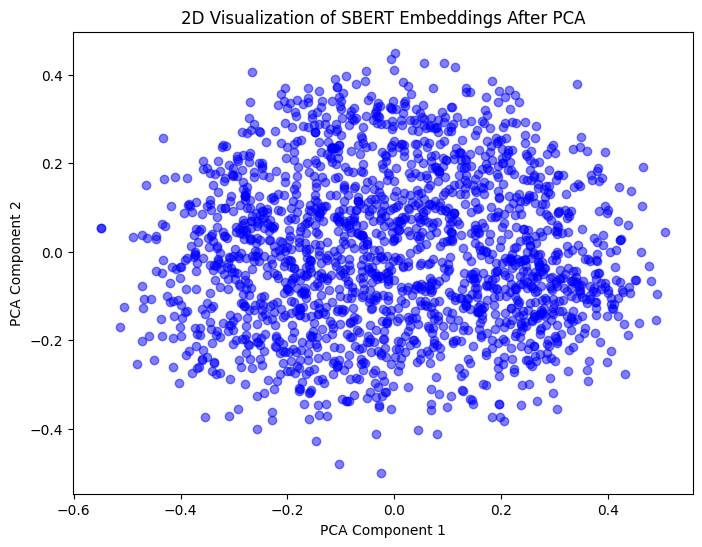

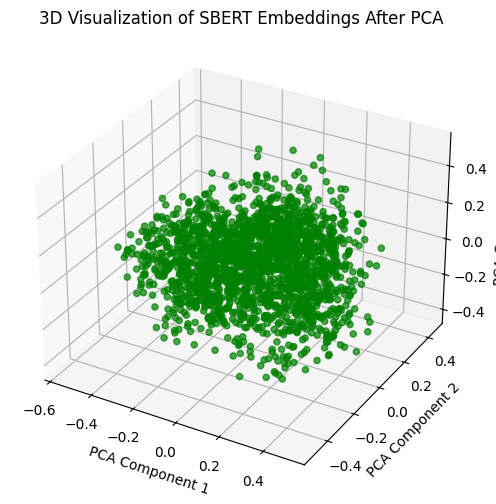

In [32]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce SBERT embeddings to 50 components
n_components = 50
pca = PCA(n_components=n_components)
reduced_vectors = pca.fit_transform(post_vectors)

print(f"Reduced matrix shape: {reduced_vectors.shape}")

# 2D Visualization
plt.figure(figsize=(8, 6))
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], alpha=0.5, c='blue')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("2D Visualization of SBERT Embeddings After PCA")
plt.show()

# 3D Visualization
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")

sc = ax.scatter(
    reduced_vectors[:, 0], 
    reduced_vectors[:, 1], 
    reduced_vectors[:, 2], 
    alpha=0.7, 
    c='green', 
    s=20
)

ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("PCA Component 3")
ax.set_title("3D Visualization of SBERT Embeddings After PCA")

plt.show()



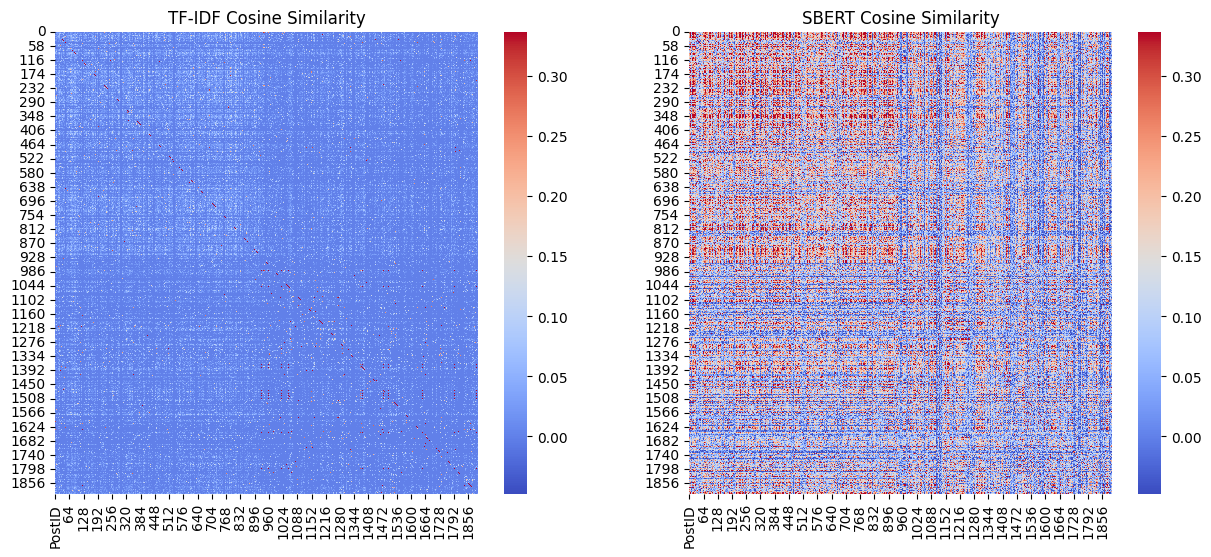

In [9]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load matrices
cosine_sim_matrix_tfidf = pd.read_csv(
    "../caption_from_body/posts_similarity_matrix.csv"
)
cosine_sim_matrix_sbert = pd.read_csv(
    "../caption_from_body/posts_similarity_matrix_sbert.csv"
)

# Compute the 5th and 95th percentile for better scaling
vmin = min(np.percentile(cosine_sim_matrix_tfidf, 5), np.percentile(cosine_sim_matrix_sbert, 5))
vmax = max(np.percentile(cosine_sim_matrix_tfidf, 95), np.percentile(cosine_sim_matrix_sbert, 95))

# Plot heatmaps with the same scale
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.heatmap(cosine_sim_matrix_tfidf, cmap="coolwarm", vmin=vmin, vmax=vmax, ax=axes[0])
axes[0].set_title("TF-IDF Cosine Similarity")

sns.heatmap(cosine_sim_matrix_sbert, cmap="coolwarm", vmin=vmin, vmax=vmax, ax=axes[1])
axes[1].set_title("SBERT Cosine Similarity")

plt.show()
